In [23]:
from hapi import*
import pandas as pd

In [2]:
db_begin('data')

Using data

H2O_13
                     Lines parsed: 170
H2O_07
                     Lines parsed: 585
H2O
                     Lines parsed: 251
CO2
                     Lines parsed: 129
H2O_14
                     Lines parsed: 251


In [3]:
#--- convert wavelengths to wavenumber
wl_start = 10.8e-6 #m
wl_end = 11.6e-6 #m

wn_start = round((1/wl_start)/100, 2) #cm-1
wn_end = round((1/wl_end)/100, 2) #cm-1

print('Wavenumbers from ' + str(wn_start) +' to '+ str(wn_end))

Wavenumbers from 925.93 to 862.07


In [4]:
#--- fetch(name of table with data, molecule number, isotopologue number, wavenumber start, wavenumber end)

fetch('H2O',1,1,wn_end,wn_start)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 251
PROCESSED


In [5]:
tableList()

dict_keys(['sampletab', 'H2O_13', 'H2O_07', 'H2O', 'CO2', 'H2O_14'])

In [6]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 862.070-925.930 wavenumber range
Number of rows: 251
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag       

In [7]:
mol_id=1
iso_id=1
abundance(mol_id,iso_id)

0.9973173

HITRAN units = True means that we are using cm2 molec-1. If this were set to False, we would be using cm-1. 

In [8]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':217.,'p':0.100666}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))

{'self': 1.0}
0.060147 seconds elapsed for abscoef; nlines = 251
5.804861591771796e-23


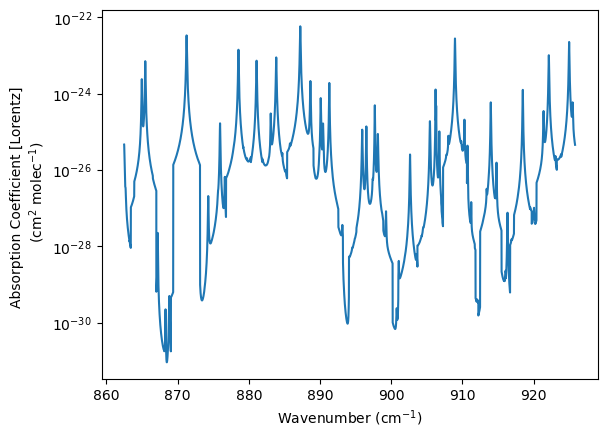

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

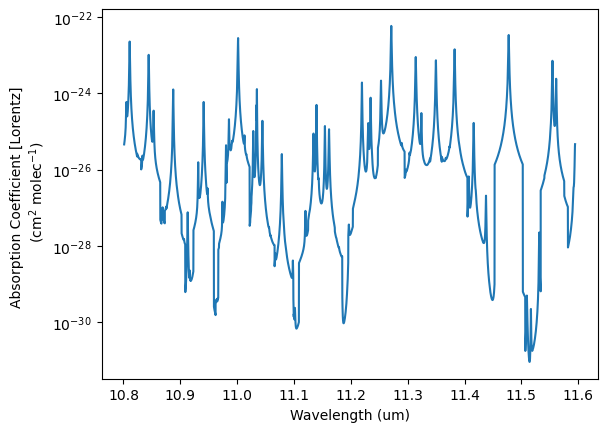

In [10]:
wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots()
ax.semilogy(wl,coef)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

{'self': 1.0}
0.161123 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.045697 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.066403 seconds elapsed for abscoef; nlines = 251


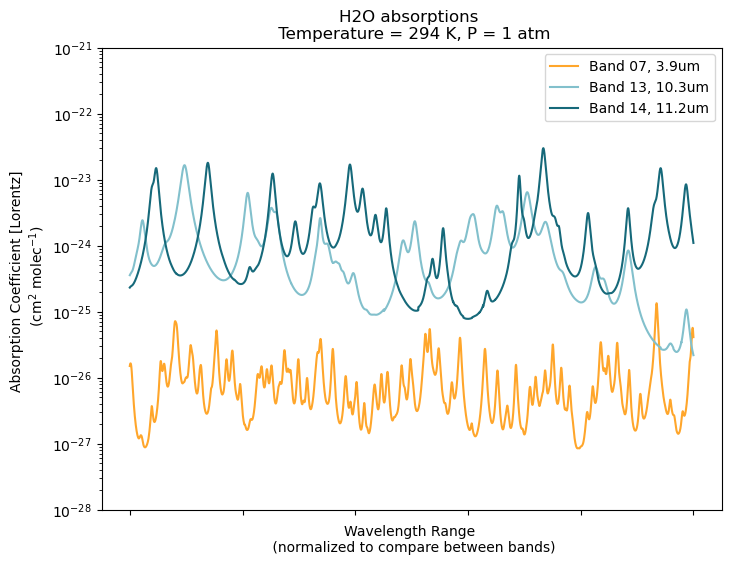

In [11]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-29, 10e-22])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Converting the cm2 molec-1 to m2 kg-1:
* written out in Miller Time notes

In [12]:
#--- mass of water
m_water = 18.01528/1000 #kg mole-1
#--- mole
molec_mole = 6.022e23 #molec mole-1
#--- kg molec-1
kg_molec = m_water*(1/molec_mole)

print(kg_molec)

2.991577548987048e-26


{'self': 1.0}
0.161865 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.045457 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.067541 seconds elapsed for abscoef; nlines = 251


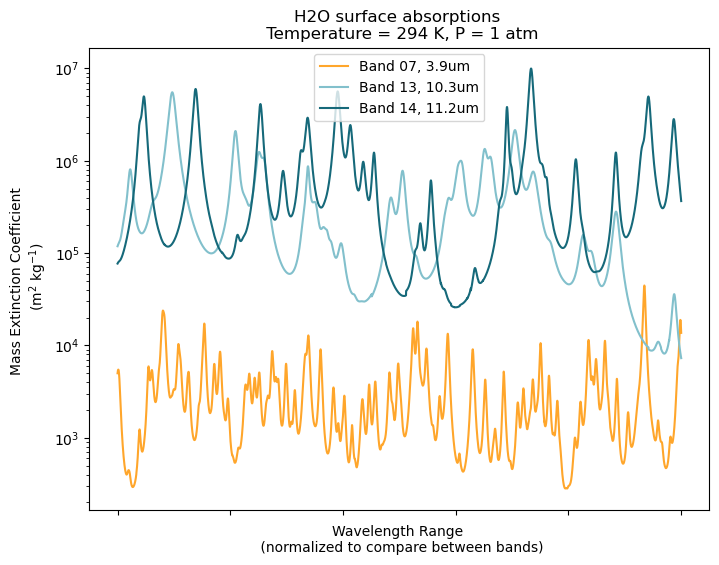

In [13]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

#--- convert cm2/molec to m2/kg
mass_ext_07 = (coef_07*100**2)/kg_molec
mass_ext_13 = (coef_13*100**2)/kg_molec
mass_ext_14 = (coef_14*100**2)/kg_molec

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,mass_ext_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,mass_ext_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,mass_ext_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
#ax.set_ylim([10e20, 10e26])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Mass Extinction Coefficient \n (m$^{2}$ kg$^{-1}$)')
ax.set_title('H2O surface absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()


Using the 1/cm units instead:

{'self': 1.0}
0.160171 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.045990 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.067370 seconds elapsed for abscoef; nlines = 251


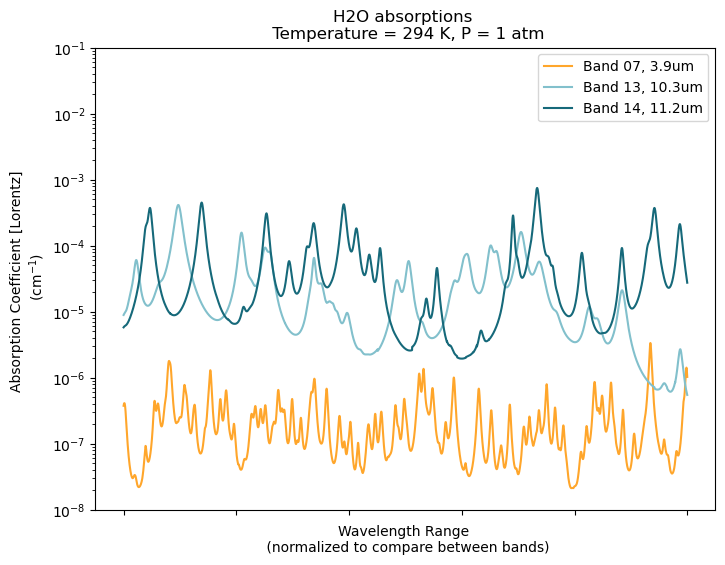

In [14]:
#--- Using surface-level temperature and pressure
nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)


nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-9, 10e-2])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Creating a look-up-table of mass extinction coefficients (K) by the input temperature and pressure:

In [15]:
#--- Set the standard colorbar ranges for the plots
ext_min=0
ext_max=600_000

In [16]:
#--- Setting the temperature and pressure ranges
T07 = np.arange(174, 294, 10)
p07 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg07 = []

# Loop through temperature and pressure combinations
for temp in T07:
    for pres in p07:
        nu_07, coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_07 = (coef_07 * 100 ** 2) / kg_molec
        mass_ext_avg07.append(np.mean(mass_ext_07))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_07))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg07 = np.array(mass_ext_avg07).reshape(len(T07), len(p07))

{'self': 1.0}
0.172643 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 1.0 mass ext average: 79.6578535128149
{'self': 1.0}
0.170060 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.9 mass ext average: 79.721447939976
{'self': 1.0}
0.159900 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.8 mass ext average: 79.78309081132164
{'self': 1.0}
0.156196 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.7000000000000001 mass ext average: 79.85172162056561
{'self': 1.0}
0.150025 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.6000000000000001 mass ext average: 79.92982189753864
{'self': 1.0}
0.148179 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.5000000000000001 mass ext average: 80.01208628161848
{'self': 1.0}
0.142660 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.40000000000000013 mass ext average: 80.10471583101814
{'self': 1.0}
0.142936 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.3000

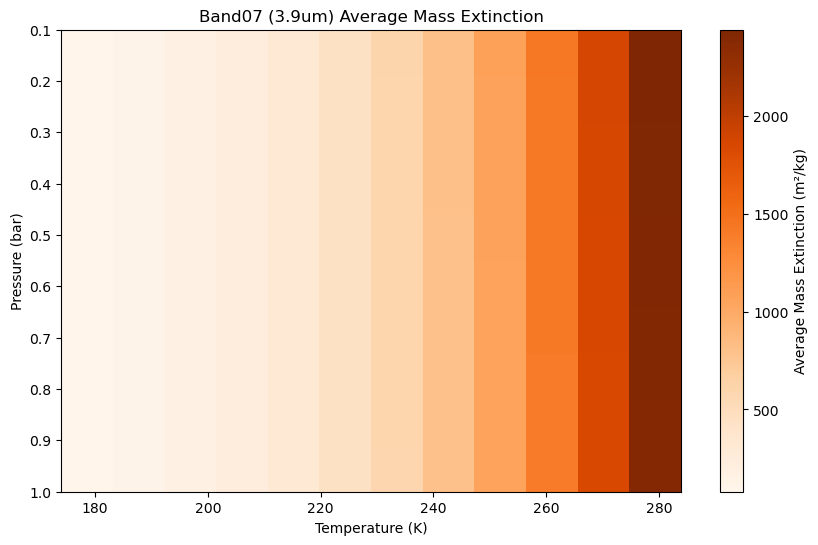

In [17]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg07), extent=[T07[0], T07[-1], p07[0], p07[-1]], aspect='auto', origin='lower', cmap='Oranges')
img.set_clim(vmin=np.min(mass_ext_avg07), vmax=np.max(mass_ext_avg07))

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band07 (3.9um) Average Mass Extinction')
plt.show()

In [18]:
#--- Setting the temperature and pressure ranges
T14 = np.arange(174, 294, 10)
p14 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg14 = []

# Loop through temperature and pressure combinations
for temp in T14:
    for pres in p14:
        nu_14, coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_14 = (coef_14 * 100 ** 2) / kg_molec
        mass_ext_avg14.append(np.mean(mass_ext_14))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_14))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg14 = np.array(mass_ext_avg14).reshape(len(T14), len(p14))

{'self': 1.0}
0.074113 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 1.0 mass ext average: 29424.607754862922
{'self': 1.0}
0.067534 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.9 mass ext average: 29492.94888904783
{'self': 1.0}
0.067456 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.8 mass ext average: 29561.122776479406
{'self': 1.0}
0.069397 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.7000000000000001 mass ext average: 29629.494735623797
{'self': 1.0}
0.067476 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.6000000000000001 mass ext average: 29699.652877279037
{'self': 1.0}
0.066277 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.5000000000000001 mass ext average: 29771.51158676405
{'self': 1.0}
0.068730 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.40000000000000013 mass ext average: 29844.331871223127
{'self': 1.0}
0.066177 seconds elapsed for abscoef; nlines = 251
temp: 174 press

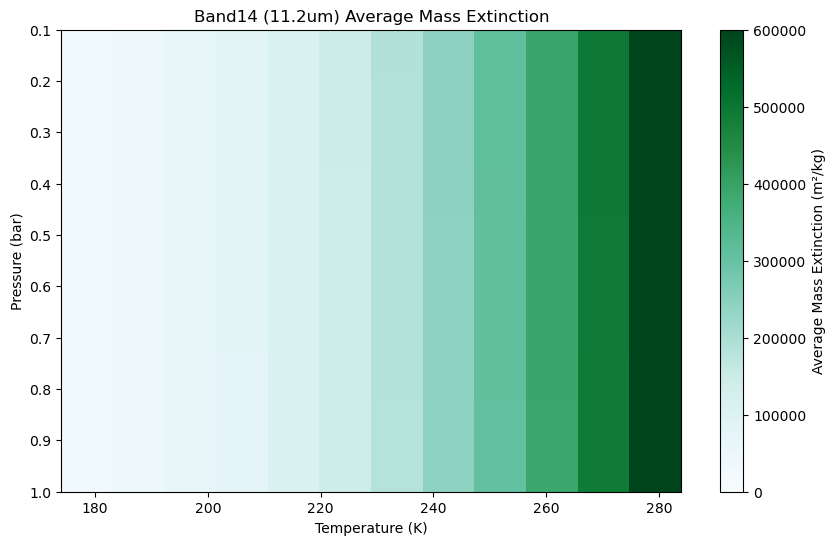

In [19]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg14), extent=[T14[0], T14[-1], p14[0], p14[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band14 (11.2um) Average Mass Extinction')
plt.show()

In [20]:
#--- Setting the temperature and pressure ranges
T13 = np.arange(174, 294, 10)
p13 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg13 = []

# Loop through temperature and pressure combinations
for temp in T13:
    for pres in p13:
        nu_13, coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_13 = (coef_13 * 100 ** 2) / kg_molec
        mass_ext_avg13.append(np.mean(mass_ext_13))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_13))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg13 = np.array(mass_ext_avg13).reshape(len(T13), len(p13))

{'self': 1.0}
0.049766 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 1.0 mass ext average: 8451.597626973813
{'self': 1.0}
0.050688 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.9 mass ext average: 8469.672827746495
{'self': 1.0}
0.046460 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.8 mass ext average: 8487.7084977877
{'self': 1.0}
0.045189 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.7000000000000001 mass ext average: 8504.987039675265
{'self': 1.0}
0.045882 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.6000000000000001 mass ext average: 8521.892172650936
{'self': 1.0}
0.044891 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.5000000000000001 mass ext average: 8537.240402108673
{'self': 1.0}
0.042930 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.40000000000000013 mass ext average: 8550.829581451919
{'self': 1.0}
0.042332 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.300

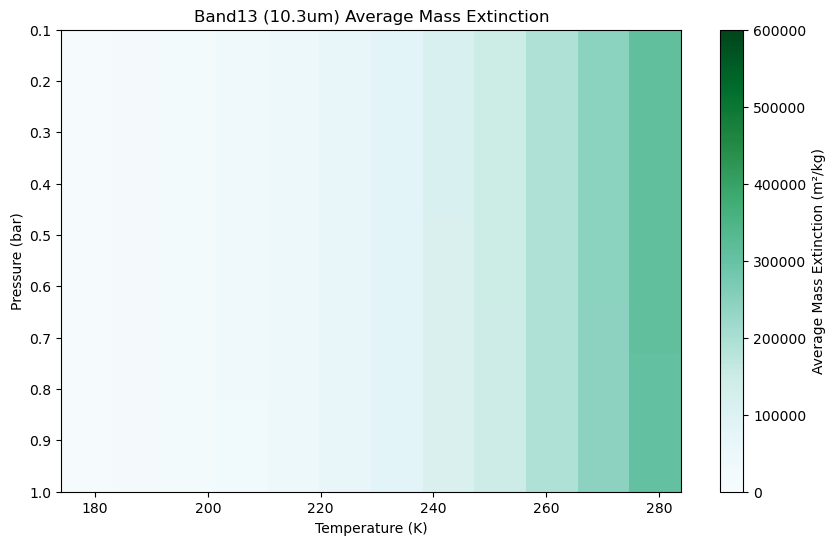

In [21]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg13), extent=[T13[0], T13[-1], p13[0], p13[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band13 (10.3um) Average Mass Extinction')
plt.show()

In [27]:
#---Converting pressure from atm to hPa
p13_hPa = p13/0.000987

#---Creating the dataframe for the look-up-table
mass_ext_df_13 = pd.DataFrame(mass_ext_avg13, index=T13, columns=p13_hPa)
mass_ext_df_13

,1013.171226,911.854103,810.536981,709.219858,607.902736,506.585613,405.268490,303.951368,202.634245,101.317123
174,8451.597627,8469.672828,8487.708498,8504.987040,8521.892173,8537.240402,8550.829581,8563.752987,8576.395605,8578.753252
184,13431.982442,13459.654218,13486.986066,13513.297325,13539.121070,13561.758915,13582.692339,13602.705012,13621.144926,13624.151403
194,20542.636815,20583.424037,20623.367086,20661.965361,20699.755910,20732.276453,20763.246405,20793.019322,20818.784452,20822.680139
204,30375.550077,30433.668912,30490.020472,30544.891664,30598.147582,30643.777027,30687.988018,30730.733948,30765.389140,30770.576868
214,43603.203531,43683.363793,43760.724612,43836.733895,43908.364277,43971.830934,44033.034939,44092.576780,44137.609497,44144.796746
224,60979.251384,61086.825553,61190.835744,61293.512713,61387.146312,61473.345849,61555.826680,61636.577502,61693.549630,61703.611009
234,83341.099046,83482.411459,83619.078600,83754.854114,83874.480388,83988.814818,84097.339854,84204.394472,84274.721368,84289.280272
244,111613.753910,111794.900257,111971.785039,112146.026536,112297.872378,112445.709765,112586.326969,112725.251327,112810.777408,112832.010660
254,146815.646449,147044.818576,147270.078436,147487.842032,147679.204160,147866.478839,148046.148967,148223.332038,148325.808468,148356.571556
264,190068.861603,190354.981603,190637.567293,190903.941583,191143.059115,191376.804083,191602.848771,191825.447331,191947.096398,191991.159773


In [26]:
mass_ext_df_13.to_pickle('tables/mass_ext_band13')